In [ ]:
import warnings
warnings.filterwarnings('ignore')
from src import LdaModel, DataProcess, Word2VecModel, LinearModel, ArimaModel

In [2]:
dp = DataProcess('data/论文数据/', stopwords='config/stopwords.txt')
# dp = DataProcess('data/CNKI-20240306170144612.txt', stopwords='config/stopwords.txt')

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\STUDYH~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.651 seconds.
Prefix dict has been built succesfully.


In [3]:
# 关键词加入词表
keywords = dp.split_keywords()
dp.add_words(keywords)

In [4]:
# 分词
processed_docs = dp.get_tokens('summary')

In [5]:
lda = LdaModel(processed_docs)

In [ ]:
# 根据一致性选取最佳的主题数
tn, cs, ps = lda.cal_coherence(2, 50)
lda.plot_coherence(tn, cs, name='Coherence')
lda.plot_coherence(tn, ps, name='Perplexity')

In [6]:
# 确定主题数，进行LDA建模
# topics = tn[cs.index(max(cs))]
topics = 30
lda.fit(num_topics=topics)

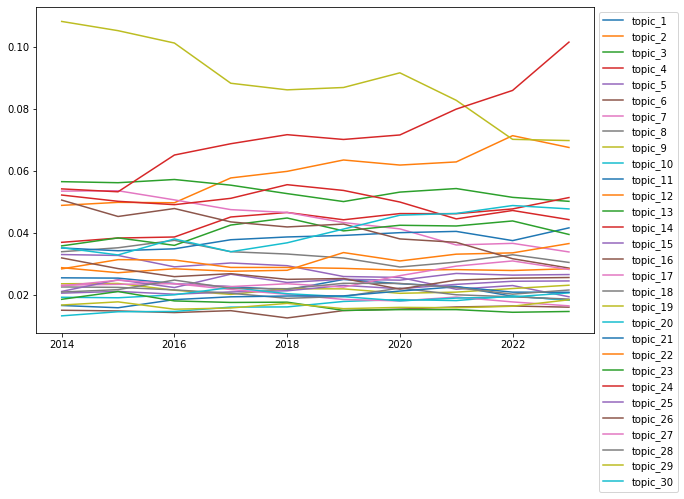

In [7]:
# 主题强度趋势图
lda.topic_timestramp(dp.get_date())

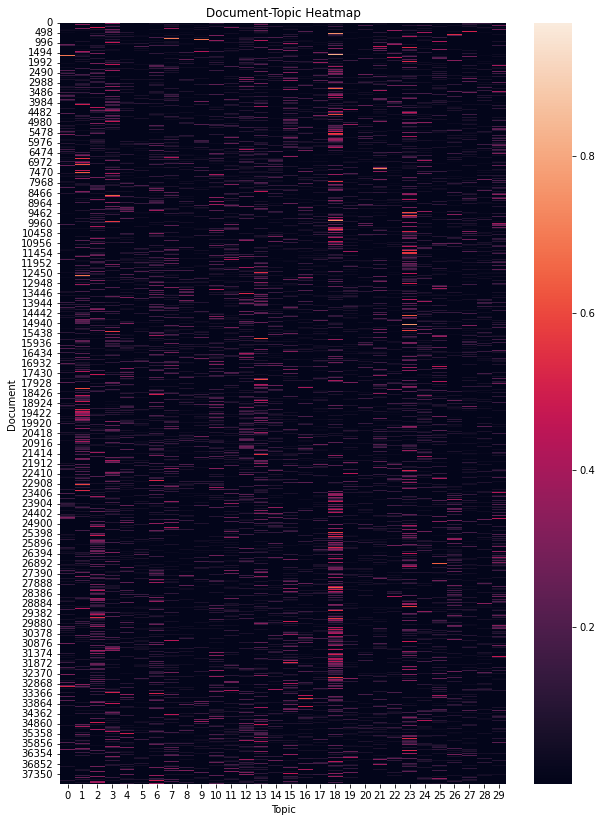

In [8]:
# 主题分布热力图
lda.topic_heatmap()

In [9]:
# 建立线性模型，根据均值与斜率选取话题
df = lda.topic_value
lm = LinearModel(df)

In [10]:
idxs, cols = lm.select_topic()
print(cols)

['topic_24', 'topic_2', 'topic_4', 'topic_30', 'topic_13']


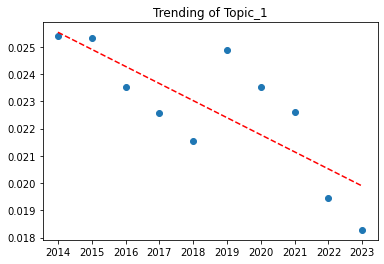

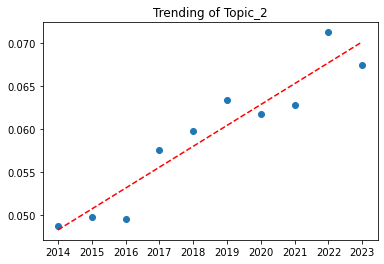

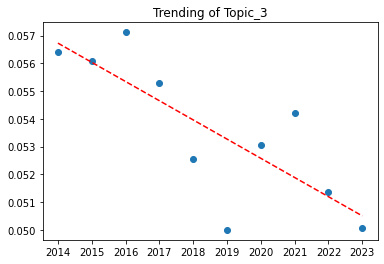

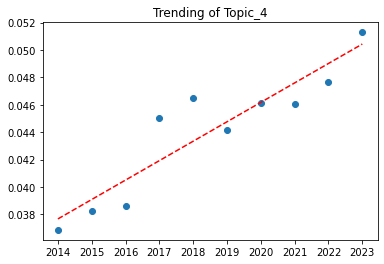

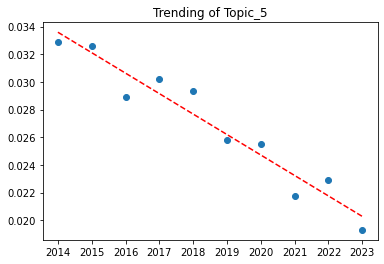

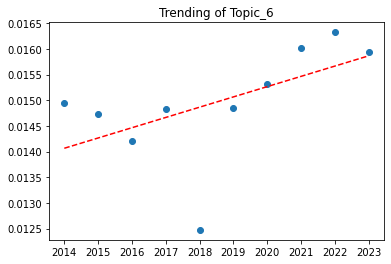

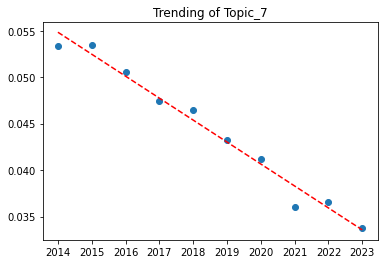

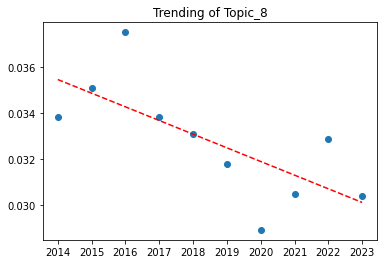

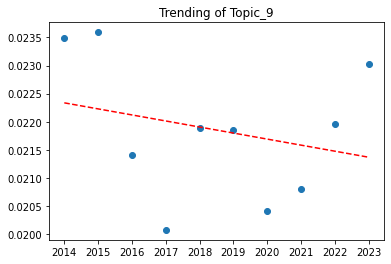

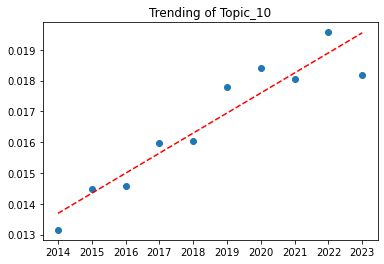

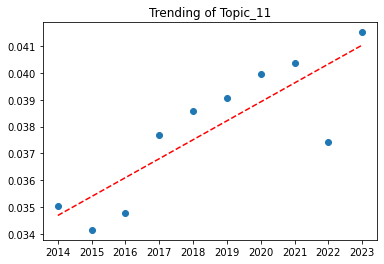

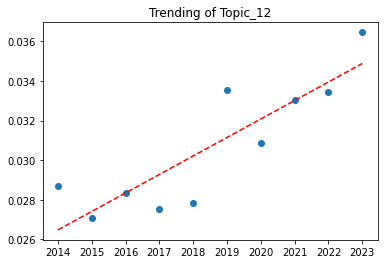

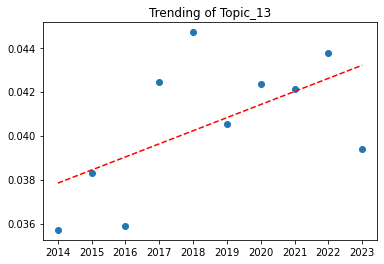

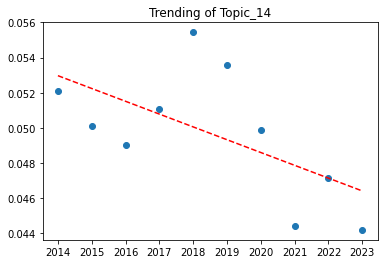

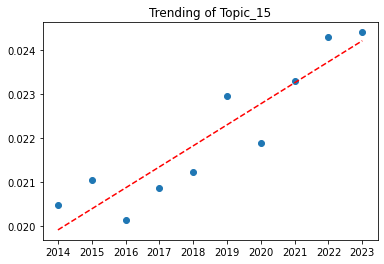

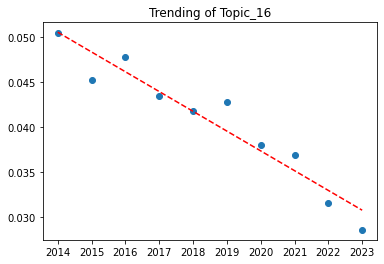

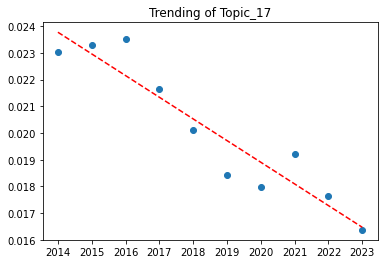

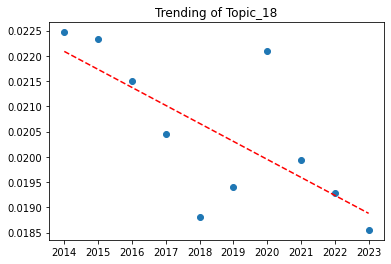

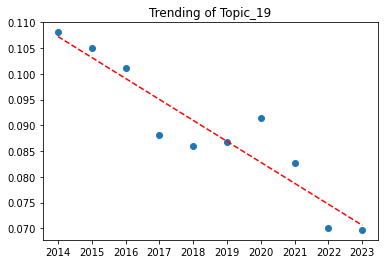

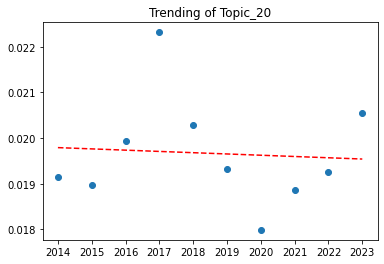

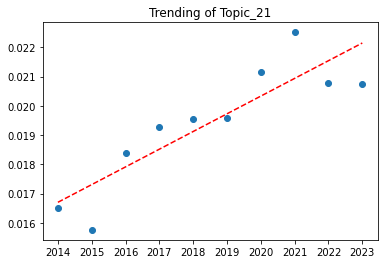

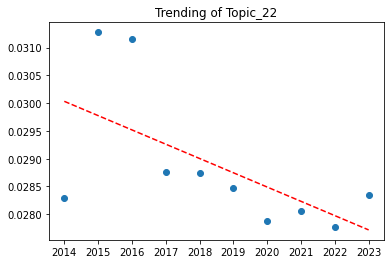

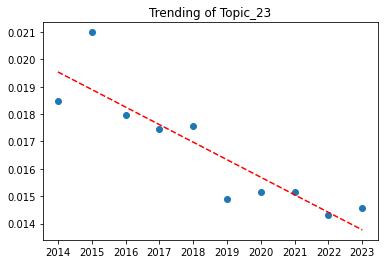

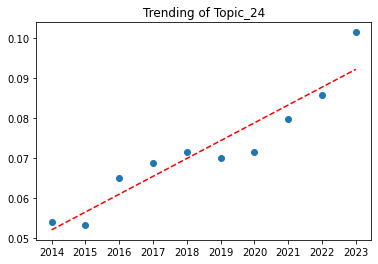

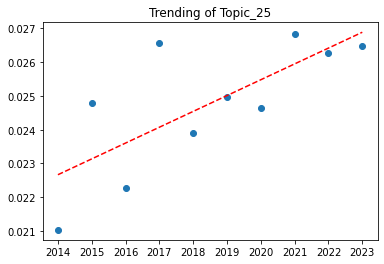

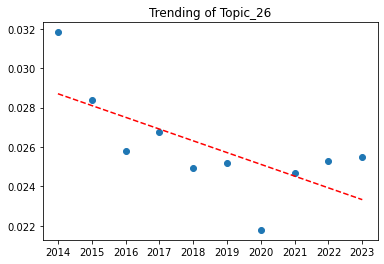

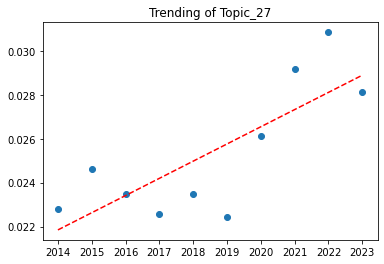

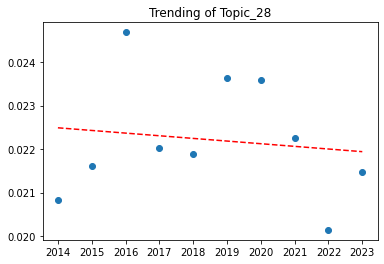

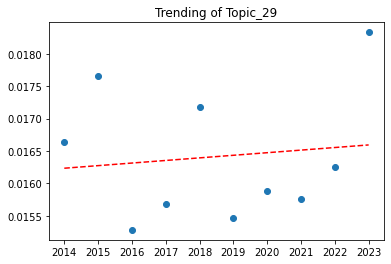

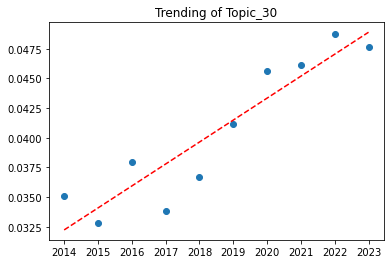

In [11]:
# 线性拟合图
for i in range(topics):
    lm.fit(i)
    lm.plot_model_fit()

In [12]:
# 主题热度
df

,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,...,topic_21,topic_22,topic_23,topic_24,topic_25,topic_26,topic_27,topic_28,topic_29,topic_30
2014,0.025411,0.048774,0.056423,0.036857,0.032918,0.014955,0.053367,0.033831,0.023495,0.013150,...,0.016492,0.028293,0.018483,0.054090,0.021029,0.031828,0.022802,0.020828,0.016643,0.035116
2015,0.025317,0.049751,0.056082,0.038240,0.032626,0.014731,0.053492,0.035102,0.023592,0.014474,...,0.015759,0.031277,0.020987,0.053158,0.024785,0.028387,0.024640,0.021602,0.017660,0.032791
2016,0.023545,0.049621,0.057119,0.038579,0.028945,0.014207,0.050547,0.037506,0.021415,0.014571,...,0.018388,0.031147,0.017961,0.065012,0.022277,0.025792,0.023497,0.024684,0.015281,0.037942
2017,0.022560,0.057623,0.055287,0.045029,0.030197,0.014819,0.047402,0.033829,0.020074,0.015966,...,0.019290,0.028763,0.017469,0.068655,0.026580,0.026748,0.022587,0.022028,0.015686,0.033833
2018,0.021546,0.059744,0.052568,0.046492,0.029324,0.012472,0.046485,0.033080,0.021890,0.016028,...,0.019544,0.028751,0.017564,0.071571,0.023909,0.024918,0.023499,0.021897,0.017172,0.036702
2019,0.024884,0.063409,0.050002,0.044129,0.025835,0.014849,0.043227,0.031794,0.021851,0.017793,...,0.019584,0.028469,0.014905,0.070031,0.024959,0.025184,0.022420,0.023642,0.015466,0.041131
2020,0.023518,0.061775,0.053055,0.046127,0.025541,0.015317,0.041192,0.028907,0.020418,0.018397,...,0.021141,0.027877,0.015158,0.071480,0.024656,0.021786,0.026114,0.023598,0.015882,0.045605
2021,0.022622,0.062786,0.054198,0.046088,0.021725,0.016023,0.036001,0.030472,0.020799,0.018066,...,0.022516,0.028057,0.015156,0.079814,0.026823,0.024677,0.029183,0.022253,0.015761,0.046171
2022,0.019462,0.071255,0.051359,0.047632,0.022922,0.016325,0.036529,0.032854,0.021958,0.019570,...,0.020792,0.027773,0.014300,0.085843,0.026281,0.025302,0.030855,0.020144,0.016248,0.048726
2023,0.018279,0.067448,0.050077,0.051296,0.019303,0.015946,0.033757,0.030378,0.023026,0.018182,...,0.020753,0.028345,0.014558,0.101423,0.026468,0.025513,0.028117,0.021478,0.018332,0.047640


In [14]:
# 建立arima模型，预测主题走势
value = df.loc[:, cols[0]]
am = ArimaModel(value)

In [15]:
am.set_params(p=1, d=1, q=1)
am.fit()

new params: p: 1 d: 1 q : 1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   10
Model:                 ARIMA(1, 1, 1)   Log Likelihood                  31.700
Date:                Sat, 16 Mar 2024   AIC                            -57.399
Time:                        21:35:50   BIC                            -56.808
Sample:                             0   HQIC                           -58.676
                                 - 10                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9817      0.236      4.157      0.000       0.519       1.445
ma.L1         -0.8263      1.136     -0.727      0.467      -3.053       1.401
sigma2      4.517e-05   

E:\anaconda3\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


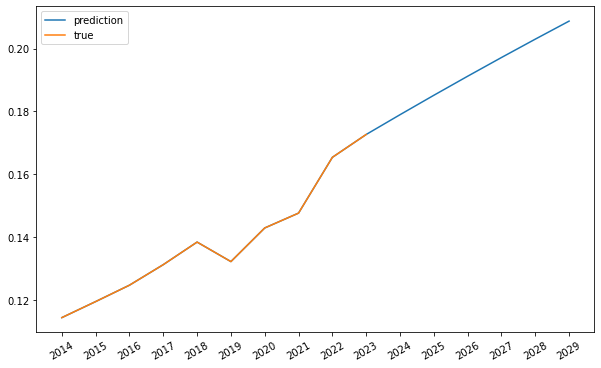

In [16]:
am.plot_predict(step=5)

In [13]:
# 建立word2vec模型，探索潜在主题
wv = Word2VecModel(processed_docs)

In [14]:
topics = lda.top_topics

In [15]:
# []内为主题下位词， 根据下位词相似度搜索找到相关联的潜在词汇，发掘潜在主题
for i in range(len(topics)):
    print('Topics {}'.format(i + 1))
    wv.analyze_topic(topics[0])
    print('#' * 50)

Topics 1
[影响因素]
关键影响因素 0.6401158571243286
解释结构模型 0.590108335018158
解释结构模型法 0.5787675380706787
影响因素模型 0.5533956289291382
作用机理 0.551914393901825
--------------------------------------------------
[大学生]
消费观 0.7614025473594666
高校大学生 0.7453146576881409
2700 0.74072265625
课外阅读状况 0.7366054654121399
在校 0.7361899614334106
--------------------------------------------------
[社交媒体]
多元交互 0.8627164363861084
政治传播 0.8138322234153748
网上商店 0.8046639561653137
跨学科用户发现 0.7824495434761047
网上课堂 0.7657465934753418
--------------------------------------------------
[满意度]
健康监测穿戴产品 0.8235892653465271
用户满意度 0.7795019745826721
满意 0.7641463279724121
使用成本 0.7534773349761963
移动政务APP 0.7398848533630371
--------------------------------------------------
[认知]
turn 0.6823406219482422
数智化人才 0.6518963575363159
即受 0.647544801235199
网络募捐 0.6459530591964722
要素链接 0.6443201899528503
--------------------------------------------------
[编码]
译码 0.8566768169403076
哈夫曼 0.8316339254379272
项目时效因素 0.787059485912323
热帖 0.7782411575317383

采纳意向 0.895184338092804
感知信任 0.8824122548103333
--------------------------------------------------
[有助于]
有利于 0.7292009592056274
旨在 0.5354260206222534
加深 0.49480199813842773
理解 0.4757453203201294
健康传播 0.46305060386657715
--------------------------------------------------
##################################################
Topics 6
[影响因素]
关键影响因素 0.6401158571243286
解释结构模型 0.590108335018158
解释结构模型法 0.5787675380706787
影响因素模型 0.5533956289291382
作用机理 0.551914393901825
--------------------------------------------------
[大学生]
消费观 0.7614025473594666
高校大学生 0.7453146576881409
2700 0.74072265625
课外阅读状况 0.7366054654121399
在校 0.7361899614334106
--------------------------------------------------
[社交媒体]
多元交互 0.8627164363861084
政治传播 0.8138322234153748
网上商店 0.8046639561653137
跨学科用户发现 0.7824495434761047
网上课堂 0.7657465934753418
--------------------------------------------------
[满意度]
健康监测穿戴产品 0.8235892653465271
用户满意度 0.7795019745826721
满意 0.7641463279724121
使用成本 0.7534773349761963
移动政务APP 0.7398848533630371


感知收益 0.9248678684234619
感知利益 0.9230091571807861
信息披露意愿 0.9019559621810913
采纳意向 0.895184338092804
感知信任 0.8824122548103333
--------------------------------------------------
[有助于]
有利于 0.7292009592056274
旨在 0.5354260206222534
加深 0.49480199813842773
理解 0.4757453203201294
健康传播 0.46305060386657715
--------------------------------------------------
##################################################
Topics 9
[影响因素]
关键影响因素 0.6401158571243286
解释结构模型 0.590108335018158
解释结构模型法 0.5787675380706787
影响因素模型 0.5533956289291382
作用机理 0.551914393901825
--------------------------------------------------
[大学生]
消费观 0.7614025473594666
高校大学生 0.7453146576881409
2700 0.74072265625
课外阅读状况 0.7366054654121399
在校 0.7361899614334106
--------------------------------------------------
[社交媒体]
多元交互 0.8627164363861084
政治传播 0.8138322234153748
网上商店 0.8046639561653137
跨学科用户发现 0.7824495434761047
网上课堂 0.7657465934753418
--------------------------------------------------
[满意度]
健康监测穿戴产品 0.8235892653465271
用户满意度 0.7795019745826721

机理模型 0.8107002377510071
计划行为理论 0.7653542757034302
研究模型 0.7647600173950195
信任理论 0.7601885795593262
创新扩散理论 0.7594284415245056
--------------------------------------------------
[访谈]
深度访谈 0.8781941533088684
236 0.8475540280342102
半结构化访谈 0.8192972540855408
测后 0.8188855051994324
焦点小组 0.8070902824401855
--------------------------------------------------
[体验]
沉浸 0.7675947546958923
交互体验 0.7430519461631775
感官 0.7414382696151733
直通车 0.7116933465003967
用户体验 0.707476794719696
--------------------------------------------------
[检验]
2SLS 0.738338053226471
稳健性 0.7283377051353455
于二值 0.7281433343887329
饱和度 0.7204937934875488
Hausman 0.711065411567688
--------------------------------------------------
[搜索]
效果测度 0.7922683358192444
搜索活动 0.7731935381889343
搜索过程 0.7651650309562683
Ngai 0.7614034414291382
搜索策略 0.7569811940193176
--------------------------------------------------
[范畴]
外扩 0.8380126953125
个主 0.7794699668884277
各主 0.7649648189544678
垄断协议 0.7383938431739807
从主 0.7320295572280884
----------------

有利于 0.7292009592056274
旨在 0.5354260206222534
加深 0.49480199813842773
理解 0.4757453203201294
健康传播 0.46305060386657715
--------------------------------------------------
##################################################
Topics 16
[影响因素]
关键影响因素 0.6401158571243286
解释结构模型 0.590108335018158
解释结构模型法 0.5787675380706787
影响因素模型 0.5533956289291382
作用机理 0.551914393901825
--------------------------------------------------
[大学生]
消费观 0.7614025473594666
高校大学生 0.7453146576881409
2700 0.74072265625
课外阅读状况 0.7366054654121399
在校 0.7361899614334106
--------------------------------------------------
[社交媒体]
多元交互 0.8627164363861084
政治传播 0.8138322234153748
网上商店 0.8046639561653137
跨学科用户发现 0.7824495434761047
网上课堂 0.7657465934753418
--------------------------------------------------
[满意度]
健康监测穿戴产品 0.8235892653465271
用户满意度 0.7795019745826721
满意 0.7641463279724121
使用成本 0.7534773349761963
移动政务APP 0.7398848533630371
--------------------------------------------------
[认知]
turn 0.6823406219482422
数智化人才 0.651896357536315

沉浸 0.7675947546958923
交互体验 0.7430519461631775
感官 0.7414382696151733
直通车 0.7116933465003967
用户体验 0.707476794719696
--------------------------------------------------
[检验]
2SLS 0.738338053226471
稳健性 0.7283377051353455
于二值 0.7281433343887329
饱和度 0.7204937934875488
Hausman 0.711065411567688
--------------------------------------------------
[搜索]
效果测度 0.7922683358192444
搜索活动 0.7731935381889343
搜索过程 0.7651650309562683
Ngai 0.7614034414291382
搜索策略 0.7569811940193176
--------------------------------------------------
[范畴]
外扩 0.8380126953125
个主 0.7794699668884277
各主 0.7649648189544678
垄断协议 0.7383938431739807
从主 0.7320295572280884
--------------------------------------------------
[扎根理论]
三级编码 0.8847429752349854
质性研究方法 0.878136932849884
扎根理论分析 0.8780890703201294
扎根理论方法 0.8588710427284241
深度访谈 0.8370106220245361
--------------------------------------------------
[水平]
元回归 0.6817094087600708
美国汉学 0.680324912071228
0.64 0.6477324962615967
扩散动力机制 0.6403763890266418
优质产品 0.6282446384429932
------------

消费观 0.7614025473594666
高校大学生 0.7453146576881409
2700 0.74072265625
课外阅读状况 0.7366054654121399
在校 0.7361899614334106
--------------------------------------------------
[社交媒体]
多元交互 0.8627164363861084
政治传播 0.8138322234153748
网上商店 0.8046639561653137
跨学科用户发现 0.7824495434761047
网上课堂 0.7657465934753418
--------------------------------------------------
[满意度]
健康监测穿戴产品 0.8235892653465271
用户满意度 0.7795019745826721
满意 0.7641463279724121
使用成本 0.7534773349761963
移动政务APP 0.7398848533630371
--------------------------------------------------
[认知]
turn 0.6823406219482422
数智化人才 0.6518963575363159
即受 0.647544801235199
网络募捐 0.6459530591964722
要素链接 0.6443201899528503
--------------------------------------------------
[编码]
译码 0.8566768169403076
哈夫曼 0.8316339254379272
项目时效因素 0.787059485912323
热帖 0.7782411575317383
11.0 0.7772451043128967
--------------------------------------------------
[问卷调查]
调查问卷 0.8649272322654724
回收 0.8464627861976624
问卷调查法 0.8378292918205261
问卷调研 0.8295353055000305
发放 0.8075726628303528


沉浸 0.7675947546958923
交互体验 0.7430519461631775
感官 0.7414382696151733
直通车 0.7116933465003967
用户体验 0.707476794719696
--------------------------------------------------
[检验]
2SLS 0.738338053226471
稳健性 0.7283377051353455
于二值 0.7281433343887329
饱和度 0.7204937934875488
Hausman 0.711065411567688
--------------------------------------------------
[搜索]
效果测度 0.7922683358192444
搜索活动 0.7731935381889343
搜索过程 0.7651650309562683
Ngai 0.7614034414291382
搜索策略 0.7569811940193176
--------------------------------------------------
[范畴]
外扩 0.8380126953125
个主 0.7794699668884277
各主 0.7649648189544678
垄断协议 0.7383938431739807
从主 0.7320295572280884
--------------------------------------------------
[扎根理论]
三级编码 0.8847429752349854
质性研究方法 0.878136932849884
扎根理论分析 0.8780890703201294
扎根理论方法 0.8588710427284241
深度访谈 0.8370106220245361
--------------------------------------------------
[水平]
元回归 0.6817094087600708
美国汉学 0.680324912071228
0.64 0.6477324962615967
扩散动力机制 0.6403763890266418
优质产品 0.6282446384429932
------------

健康监测穿戴产品 0.8235892653465271
用户满意度 0.7795019745826721
满意 0.7641463279724121
使用成本 0.7534773349761963
移动政务APP 0.7398848533630371
--------------------------------------------------
[认知]
turn 0.6823406219482422
数智化人才 0.6518963575363159
即受 0.647544801235199
网络募捐 0.6459530591964722
要素链接 0.6443201899528503
--------------------------------------------------
[编码]
译码 0.8566768169403076
哈夫曼 0.8316339254379272
项目时效因素 0.787059485912323
热帖 0.7782411575317383
11.0 0.7772451043128967
--------------------------------------------------
[问卷调查]
调查问卷 0.8649272322654724
回收 0.8464627861976624
问卷调查法 0.8378292918205261
问卷调研 0.8295353055000305
发放 0.8075726628303528
--------------------------------------------------
[理论模型]
机理模型 0.8107002377510071
计划行为理论 0.7653542757034302
研究模型 0.7647600173950195
信任理论 0.7601885795593262
创新扩散理论 0.7594284415245056
--------------------------------------------------
[访谈]
深度访谈 0.8781941533088684
236 0.8475540280342102
半结构化访谈 0.8192972540855408
测后 0.8188855051994324
焦点小组 0.8070902824401

搜索活动 0.7731935381889343
搜索过程 0.7651650309562683
Ngai 0.7614034414291382
搜索策略 0.7569811940193176
--------------------------------------------------
[范畴]
外扩 0.8380126953125
个主 0.7794699668884277
各主 0.7649648189544678
垄断协议 0.7383938431739807
从主 0.7320295572280884
--------------------------------------------------
[扎根理论]
三级编码 0.8847429752349854
质性研究方法 0.878136932849884
扎根理论分析 0.8780890703201294
扎根理论方法 0.8588710427284241
深度访谈 0.8370106220245361
--------------------------------------------------
[水平]
元回归 0.6817094087600708
美国汉学 0.680324912071228
0.64 0.6477324962615967
扩散动力机制 0.6403763890266418
优质产品 0.6282446384429932
--------------------------------------------------
[心理]
生理 0.8450652956962585
情感体验 0.7902687788009644
个体特征 0.7877041697502136
感知控制 0.7845793962478638
健康风险认知 0.7731509804725647
--------------------------------------------------
[结果显示]
方差分析 0.6123701930046082
多元回归分析 0.6078510880470276
单因素方差分析 0.606410562992096
418 0.6031188368797302
回归分析 0.6021987795829773
-----------------------

In [16]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

E:\anaconda3\lib\site-packages\past\types\oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable


In [17]:
d = gensimvis.prepare(lda.model, lda.corpus, lda.dictionary)

E:\anaconda3\lib\site-packages\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
E:\anaconda3\lib\site-packages\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))


In [18]:
pyLDAvis.display(d)